# CT, Markov, GT on D1, D8

In [2]:
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import matplotlib.patches as mpatches
import sys
sys.path.append('../..')
from data_import import*
from helper import*
from plot_params import*
pp = PlotParams()
from paths import*
paths = paths()

In [3]:
f4_path = paths.f4_path +'4e9c1cf/'

In [4]:
data = import_and_transform_data(f4_path, 'NOGTHSH_LEARNING_CURVES_4e9c1cf_9A_23_09_05.csv')
data_tag, data = data

## Filtering for rt<180, rt > 5000 and random trials, drop RTs above 3std

In [5]:
data = drop_RTs_above_3std_below_180(data)

In [6]:
corr_matrix = (data
                   .groupby(['model', 'participant', 'e_train', 'e_test', 'day'])
                   [['rt','rt_predicted']]
                   .corr())
corr_matrix.reset_index(inplace = True)
corr_matrix.drop(['level_5', 'rt'], axis = 1, inplace = True)
matrix = corr_matrix.loc[corr_matrix['rt_predicted'] !=1]
matrix['r_sqr'] = matrix.rt_predicted**2
matrix.drop('rt_predicted', axis = 1, inplace = True)
matrix;

In [7]:
data_ct_m =  matrix.pivot(index = ['participant', 'day'], columns = 'model', values = 'r_sqr')
data_ct_m['m_ct_diff'] = data_ct_m['iHMM'] - data_ct_m['Markov'] 
#data_ct_m

In [51]:
data_ct_m.head();

In [52]:
data_ct_m.reset_index(inplace=True)
df = data_ct_m.loc[data_ct_m['day'].isin([1, 8])][['participant', 'day','Markov', 'iHMM', 'GroundTruth']]
df.columns.name = None
df.shape

(50, 5)

In [53]:
df = df.groupby(['day', 'participant']).sum().unstack(0)

In [54]:
jitter = 0.05
df_x_jitter = pd.DataFrame(np.random.normal(loc=0,
                                                  scale=jitter, 
                                                  size=df.values.shape),
                                                  columns=df.columns)
# ennek a sornak az a lényege, hogy növekvő értékűvé tegye a random noise data-t. 
# Tehát az első oszlophoz 0-t, a másidikhoz 1-et adok hozzá hozzá. 

df_x_jitter += np.array([0, 1, 0, 1, 0, 1])

In [55]:
df.reset_index(inplace=True)

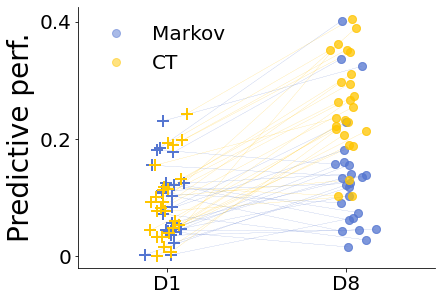

In [56]:
fig, ax = plt.subplots(figsize = pp.figsize, facecolor = 'white')
for col in df[['Markov', 'iHMM']]:
    
    if col[0] == 'Markov':
        color = pp.markov_blue
        label = 'Markov'
    if col[0] == 'iHMM':
        color = pp.ct_orange
        label = 'CT'
    
    
    
    ax.plot(df_x_jitter.loc[:,(col[0], 1)], df.loc[:,(col[0], 1)],
               '+',zorder=1, ms=12, mew=2, color = color, label = label)
    
    ax.plot(df_x_jitter.loc[:,(col[0], 8)], df.loc[:,(col[0], 8)],
           'o', alpha=0.5,zorder=1, ms=pp.markersize_matplotlib, mew=1, color = color, label = label)
    
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['D1', 'D8'], fontsize = pp.ticklabsize)
    ax.set_xlim(-0.5,1.5)
    ax.set_yticks([0, 0.2, 0.4])
    ax.set_yticklabels([0, 0.2, 0.4], fontsize = pp.ticklabsize)
    
    for idx in df.index:
        ax.plot(df_x_jitter.loc[idx, col[0]],
                df.loc[idx, col[0]],
                color = color, 
                linewidth = 0.1, linestyle = '--', zorder=-1)

    
        
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


plt.ylabel('Predictive perf.', fontsize = pp.axlabsize)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), frameon = False, fontsize = pp.legendfontsize);

# fig.text(x=0.4, y = 0.88, s =r'(All participants)', fontsize = 14)
#fig.suptitle('Markov and CT performance on Day-1, Day-8', y = 1, fontsize=16);

Text(0, 0.5, 'Predictive perf.')

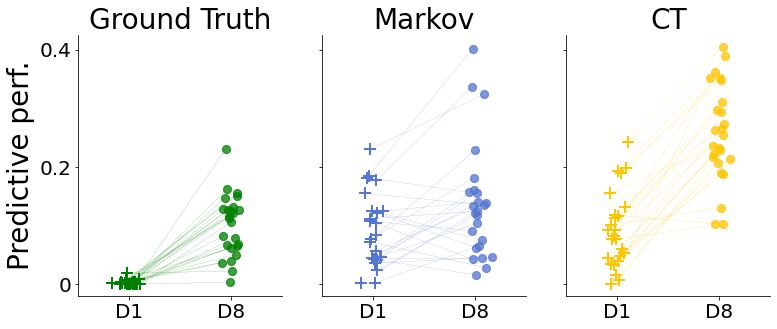

In [57]:
fig, axs = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (12.4, 4.8), facecolor = 'white')
for col in df[['GroundTruth', 'Markov', 'iHMM']].columns:


    if col[0] == 'Markov':
        color = pp.markov_blue
        label = 'Markov'
        ax_idx = 1
    if col[0] == 'iHMM':
        color = pp.ct_orange
        label = 'CT'
        ax_idx = 2
    if col[0] == 'GroundTruth':
        color = 'green'
        label = 'Ground Truth'
        ax_idx = 0
    
    
    axs[ax_idx].plot(df_x_jitter.loc[:,(col[0], 1)], df.loc[:,(col[0], 1)],
               '+',zorder=1, ms=12, mew=2, color = color, label = label)
    
    axs[ax_idx].plot(df_x_jitter.loc[:,(col[0], 8)], df.loc[:,(col[0], 8)],
           'o', alpha=0.5,zorder=1, ms=pp.markersize_matplotlib, mew=1, color = color, label = label)
    
    axs[ax_idx].set_title(label, size = pp.titlefontsize)
    
    
    for idx in df.index:
        axs[ax_idx].plot(df_x_jitter.loc[idx, col[0]],
                df.loc[idx, col[0]],
                color = color, 
                linewidth = 0.1, linestyle = '--', zorder=-1)
        
for ax in fig.axes: 
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['D1', 'D8'], fontsize = pp.ticklabsize)
    ax.set_xlim(-0.5,1.5)
    ax.set_yticks([0, 0.2, 0.4])
    ax.set_yticklabels([0, 0.2, 0.4], fontsize = pp.ticklabsize)
    
axs[0].set_ylabel('Predictive perf.', fontsize = pp.axlabsize)

In [59]:
fig.savefig(paths.plot_save_path +'/manuscript_plots_standard/' +'CT_takeover_scatter_with_lines_3sub.pdf', bbox_inches='tight')
fig.savefig(paths.plot_save_path +'/manuscript_plots_standard/' +'CT_takeover_scatter_with_lines_3sub.png', bbox_inches='tight')